In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

Ref - https://www.kaggle.com/budincsevity/szeged-weather

In [2]:
# import data
df = pd.read_csv('weatherHistory.csv')
df.columns = ['time', 'summary', 'precipType', 'temperature', 'apparentTemperature', 'humidity', 'windSpeed', 'windBearing', 'visibility', 'cloudCover', 'pressure', 'summary']
df.head()

,time,summary,precipType,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,cloudCover,pressure,summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# EDA

In [3]:
# drop duplicates, if any
df.drop_duplicates(inplace=True)

In [4]:
# summary statistics
df.describe(include='all')

,time,summary,precipType,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,cloudCover,pressure,summary
count,96429,96429,95912,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.0,96429.000000,96429
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2011-09-10 10:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,1,31726,85200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.929692,10.851707,0.734902,10.812460,187.497506,10.347225,0.0,1003.232915,NaN
std,NaN,NaN,NaN,9.550492,10.695743,0.195466,6.913345,107.376423,4.192548,0.0,116.984300,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.683333,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [5]:
df.nunique()

time                   96429
summary                   27
precipType                 2
temperature             7574
apparentTemperature     8984
humidity                  90
windSpeed               2484
windBearing              360
visibility               949
cloudCover                 1
pressure                4979
summary                  214
dtype: int64

In [6]:
# df['summary'] uniques (use iloc because summary uses df.summary() instead)
df.iloc[:, 1].value_counts()

Partly Cloudy                          31726
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10873
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [7]:
# precipType uniques
df['precipType'].unique()

array(['rain', 'snow', nan], dtype=object)

In [8]:
# drop unnecessary variables
df.drop(['summary', 'cloudCover'], axis = 1, inplace=True)

In [9]:
df.head()

,time,precipType,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,pressure
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


# Feature Engineering and/or Transformation

## Target variable

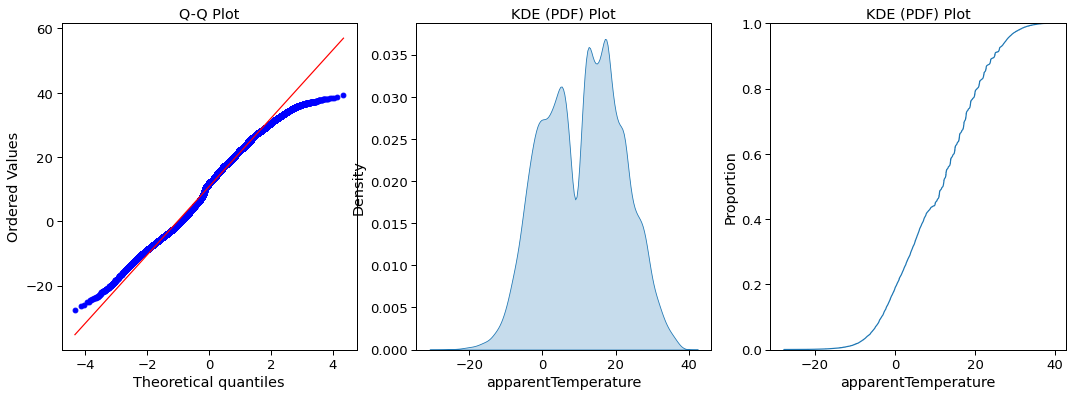

In [23]:
# pdf, cdf and qq plot
def prob_plots(x):
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))

    res = probplot(x, plot = ax[0])
    ax[0].set_title("Q-Q Plot")

    ax[1] = sns.kdeplot(x, fill = True, ax = ax[1])
    ax[1].set_title("KDE (PDF) Plot")

    ax[2] = sns.ecdfplot(x, ax = ax[2])
    ax[2].set_title("KDE (PDF) Plot")

prob_plots(df['apparentTemperature'])

Keep target variable as is. No transformations needed.

## Correlation

<AxesSubplot:>

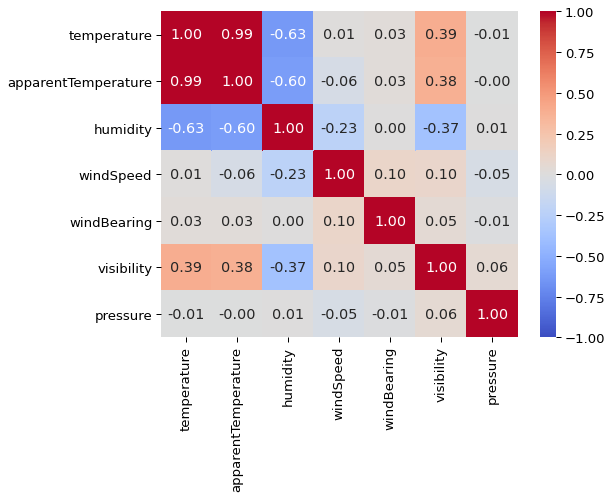

In [11]:
# correlation plot
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

df_corr = df.corr()

sns.heatmap(df_corr, annot=True, cmap = 'coolwarm', vmin = -1, vmax = 1, fmt = '.2f')

We can see that `windSpeed`, `windBearing`, `pressure` has no effect on `apparentTemperature`.

In [12]:
# drop those variables
df.drop(['windSpeed', 'windBearing', 'pressure'], axis = 1, inplace=True)
df.head()

,time,precipType,temperature,apparentTemperature,humidity,visibility
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,15.8263
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,15.8263
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,14.9569
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,15.8263
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,15.8263


## Checking effect of categorical variables

In [13]:
# ANOVA for precipType
# get different groups
df['precipType'] = df['precipType'].fillna('None')

x = []
for e in df['precipType'].unique():
    x.append(np.array(df['apparentTemperature'].loc[df['precipType'] == e]))

[e.mean() for e in x]

[13.010274191444967, -6.249847004397975, 9.462841177734793]

In [14]:
# One Way ANOVA
from scipy.stats import f_oneway

F, p = f_oneway(x[0], x[1], x[2])
print("F Statistic =", format(F, ".2f"))
print("p-Value =", format(p, '.3'))

F Statistic = 22696.42
p-Value = 0.0


Since p < 0.05, we can consider that there is a statistically significant relationship between `precipType` and `apparentTemperature`.

In [15]:
# ANOVA for time variable
# we can use time as hours from midnight to see if there is relationship between that and apparentTemprerature
df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d %H:%M:%S.%f %z')
df['hour'] = [e.hour for e in df['time']]
df.head()

,time,precipType,temperature,apparentTemperature,humidity,visibility,hour
0,2006-04-01 00:00:00+02:00,rain,9.472222,7.388889,0.89,15.8263,0
1,2006-04-01 01:00:00+02:00,rain,9.355556,7.227778,0.86,15.8263,1
2,2006-04-01 02:00:00+02:00,rain,9.377778,9.377778,0.89,14.9569,2
3,2006-04-01 03:00:00+02:00,rain,8.288889,5.944444,0.83,15.8263,3
4,2006-04-01 04:00:00+02:00,rain,8.755556,6.977778,0.83,15.8263,4


<AxesSubplot:xlabel='hour', ylabel='apparentTemperature'>

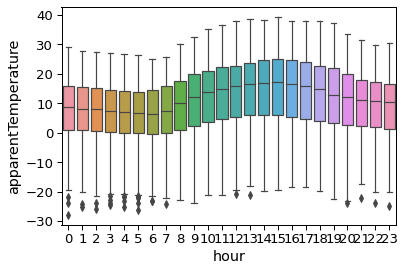

In [16]:
sns.boxplot(y = df['apparentTemperature'], x = df['hour'])

In [17]:
# get groups for one way anova
x = []

for e in df['hour'].unique():
    x.append(np.array(df['apparentTemperature'].loc[df['hour'] == e]))

[e.mean() for e in x]

[8.320862722319033,
 7.92420546012779,
 7.561696124802921,
 7.088489298158287,
 6.78279132791328,
 6.54264282948952,
 6.6282022565123615,
 7.656526187710857,
 9.16585089320281,
 10.865853658536585,
 12.395579613959406,
 13.611010176428294,
 14.534165698799844,
 15.14348902162491,
 15.429362314031303,
 15.456540014379739,
 15.12844560588463,
 14.489266356949285,
 13.583206127979647,
 12.486465073834413,
 11.158540733366518,
 10.012390077982412,
 9.53394585476467,
 8.939271887616835]

In [18]:
# one way anova
F, p = f_oneway(x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9], x[10], x[11], x[12], x[13], x[14], x[15], x[16], x[17], x[18], x[19], x[20], x[21], x[22], x[23])
print("F Statistic =", format(F, ".2f"))
print("p-Value =", format(p, '.3'))

F Statistic = 397.76
p-Value = 0.0


Since p < 0.05, we can consider that there is a statistically significant relationship between `hour` and `apparentTemperature`.

In [19]:
df['hour'] = df['hour'].astype('object')
df.dtypes

time                    object
precipType              object
temperature            float64
apparentTemperature    float64
humidity               float64
visibility             float64
hour                    object
dtype: object

## Univariate Analysis

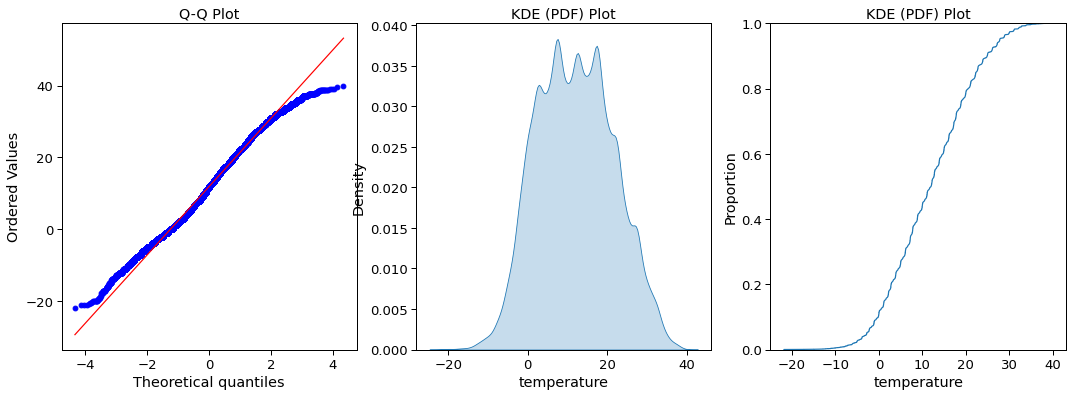

In [24]:
# temperature
prob_plots(df['temperature'])

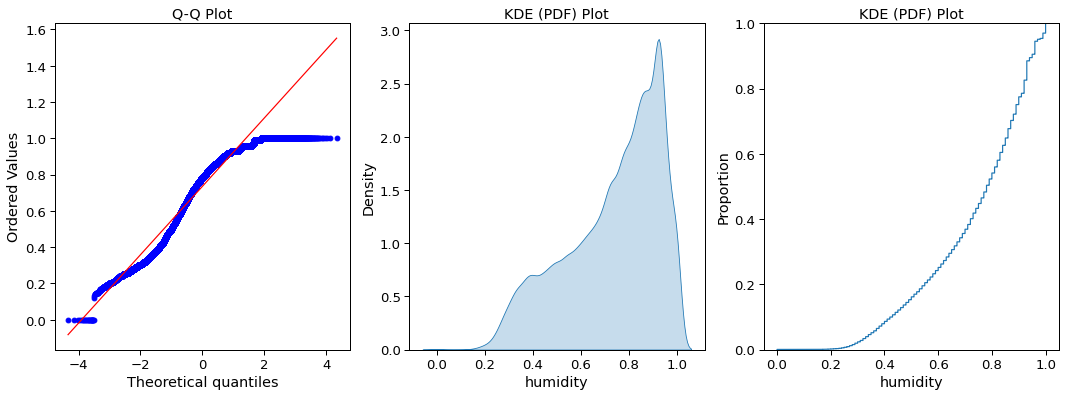

In [25]:
# humidity
prob_plots(df['humidity'])

- Since this is a left skewed (negative skewness) distribution, we will first have to reflect it into a right skewed distribution and then transform it.
- Also note that there are some values on the extreme that are very close, or equal, to each other. These often prove difficult to overcome to make our variable as normally distributed as possible.

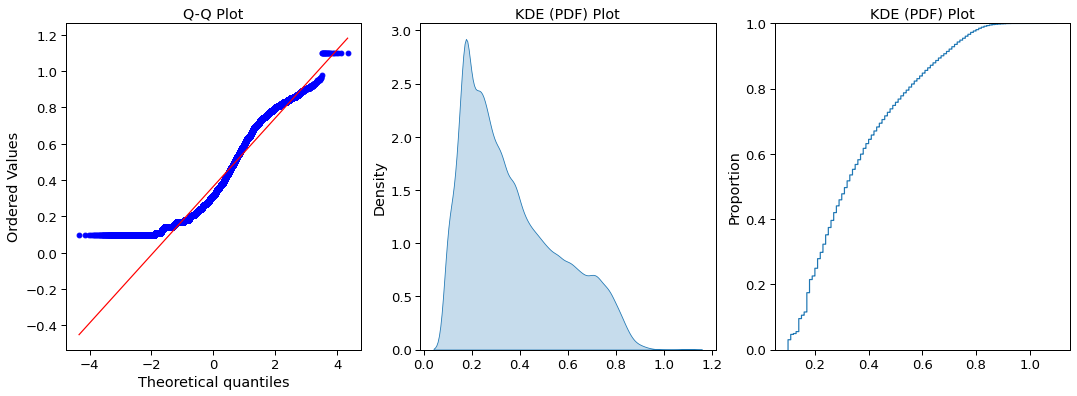

In [97]:
# reflecting using a factor of 0.01 to max(humidity)
humidity_reflected = np.array((df['humidity'].max() + 00.1) - df['humidity'])
prob_plots(humidity_reflected)

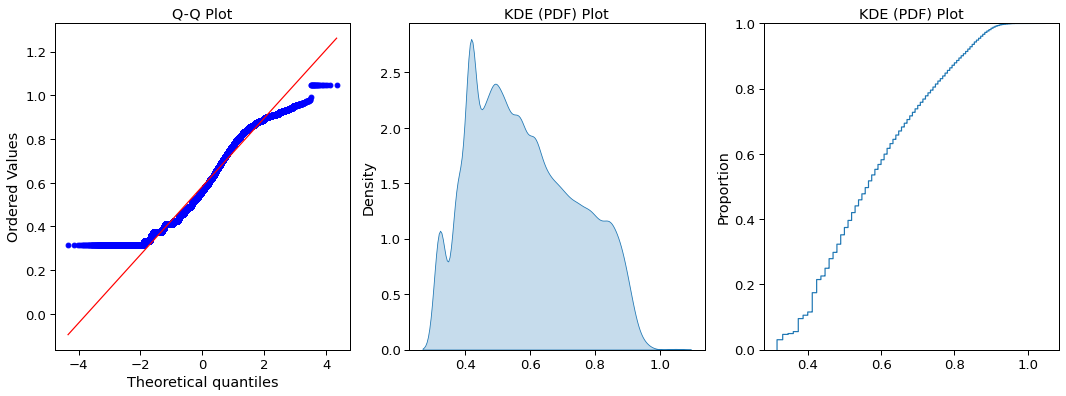

In [98]:
# square root transformation
prob_plots(np.sqrt(humidity_reflected))

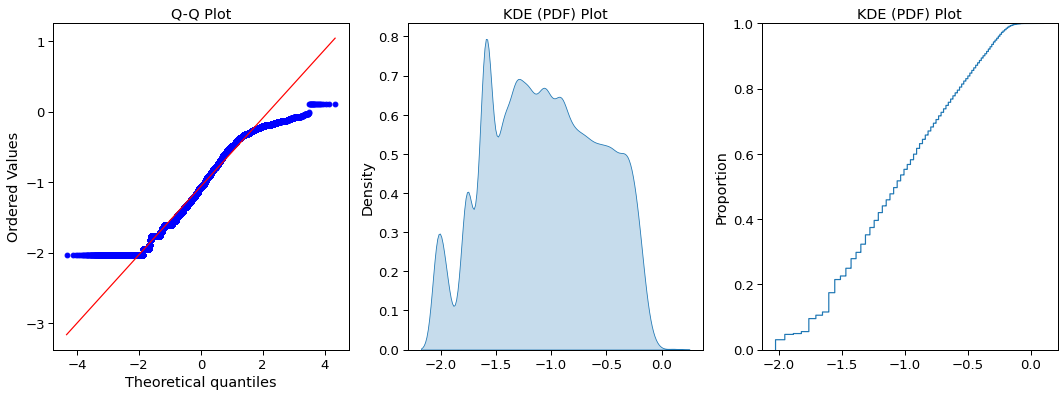

In [104]:
# box cox transformation
from scipy.stats import boxcox
xt, lambda_ = boxcox((humidity_reflected + 0.01))
lambda_
prob_plots(xt)

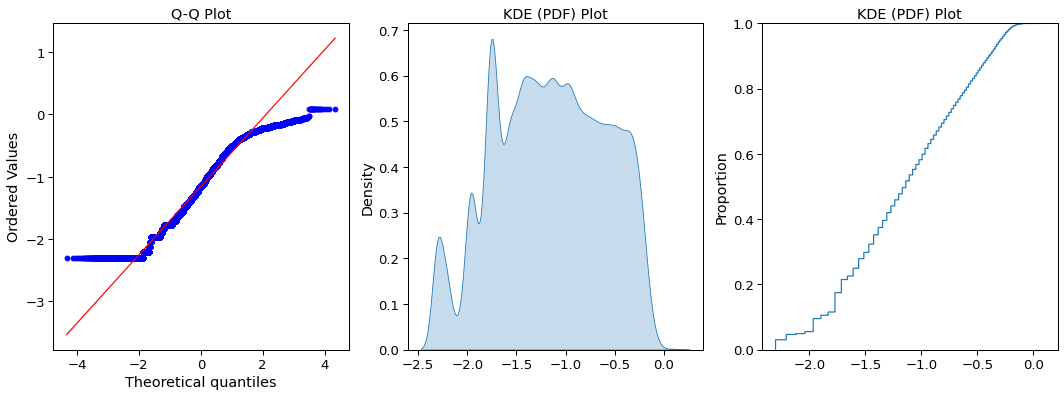

In [99]:
# log transformation
prob_plots(np.log(humidity_reflected))

We will move with a reflected log transformation.

In [105]:
df['humidity_refl_log'] = np.log(humidity_reflected)

In [107]:
df.drop(['time', 'humidity'], inplace=True, axis=1)
df.head()

,precipType,temperature,apparentTemperature,visibility,hour,humidity_refl_log
0,rain,9.472222,7.388889,15.8263,0,-1.560648
1,rain,9.355556,7.227778,15.8263,1,-1.427116
2,rain,9.377778,9.377778,14.9569,2,-1.560648
3,rain,8.288889,5.944444,15.8263,3,-1.309333
4,rain,8.755556,6.977778,15.8263,4,-1.309333


## Linear Regression